In [1]:
%matplotlib inline
from random import uniform
from math import ceil, floor
from dataclasses import dataclass

In [2]:
x0 = 0
y0 = 0 
x1 = 1000/2
y1 = 1000/2

@dataclass
class FractalParams:
    break_point1: float = uniform(0.2, 0.7)
    break_point2: float = uniform(0.2, 0.7)
    up_curve: float = uniform(-0.3, 0.3)

In [3]:
def fractal_generator(
    x0: int, y0: int, x1: int, y1: int, fractal_params: FractalParams
) -> [int, int, int, int]:

    x2 = abs(x1 - x0) * fractal_params.break_point1 + x0
    x3 = abs(x1 - x2) * fractal_params.break_point2 + x2

    m = (y0 - y1) * 1.0 / (x0 - x1)
    b = y0 - x0 * m

    y2 = (m + fractal_params.up_curve) * x2 + b
    y3 = (m - fractal_params.up_curve) * x3 + b

    return ceil(x2), ceil(y2), ceil(x3), ceil(y3)


def fractal_builder(
    x0: int, y0: int, x1: int, y1: int, fractal_params: FractalParams, level: int,
):
    if level <= 0 or (x0 == x1):
        return x0, y0, x1, y1

    x2, y2, x3, y3 = fractal_generator(x0, y0, x1, y1, fractal_params)

    l1 = fractal_builder(x0, y0, x2, y2, fractal_params, level - 1)
    l2 = fractal_builder(x2, y2, x3, y3, fractal_params, level - 1)
    l3 = fractal_builder(x3, y3, x1, y1, fractal_params, level - 1)

    return l1 + l2 + l3

In [4]:
X = fractal_builder(x0, y0, x1, y1, FractalParams(), 10)

In [5]:
import csv
from datetime import datetime
with open(f'../datasets/bf_{datetime.utcnow()}.csv', 'w', newline='') as csvfile:
    ds_writer = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    ds_writer.writerow(X)

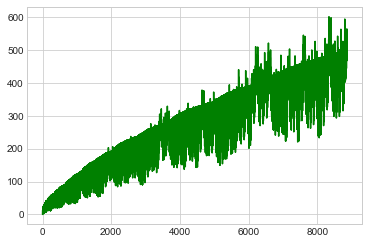

In [6]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.plot(X, color = "green")
plt.show()

In [40]:
import numpy as np
ts = np.array(X)

In [41]:
ts.mean()

296.8431652394545

In [42]:
ts.std()

150.645291292235

In [43]:
from math import ceil
def DDF(series):
    return np.histogram(series, bins=int(ceil(max(series))-floor(min(series))), density=True)    

def E(series):
    x, p = DDF(series)
    return sum([x[i] * p[i] for i in range(len(x))])

def Var(series): 
    p, x = DDF(series)
    u = E(series)
    return sum([p[i] * ((x[i] - u)**2) for i in range(len(p))])

In [44]:
mu = E(X)
sigma = Var(X)
print (f"mu = {mu} sigma={sigma}")

mu = 296.8430066603235 sigma=22693.867519282223


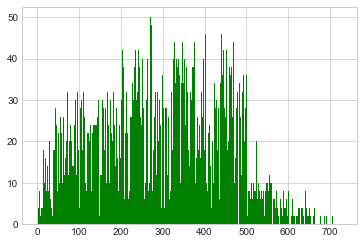

In [45]:
count, bins, ignored  = plt.hist(X, max(X)-min(X), color='green')